ARORA A STELLAR ODDESEY:QUEST 2

Imports

In [2]:
#importing some important required modules for the project
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

ModuleNotFoundError: No module named 'keras'

Reading Kp index files

In [3]:
#reading each year's (since 2016) kp index data files
dx16=pd.read_csv("2016kp.csv")
dx17=pd.read_csv("2017kp.csv")
dx18=pd.read_csv("2018kp.csv")
dx19=pd.read_csv("2019kp.csv")
dx20=pd.read_csv("2020kp.csv")
dx21=pd.read_csv("2021kp.csv")
dx22=pd.read_csv("2022kp.csv")

Reading the feature files and assigning column names

In [4]:
#naming the columns of the given raw data of year 2016 according to the given instructions in the resource file 
column_names = ['Date_Time', 'Magnetic_Field_X', 'Magnetic_Field_Y', 'Magnetic_Field_Z']
column_names.extend(['SW_Flux_' + str(i) for i in range(1, 51)])
#reading the given raw data of year 2016
d16=pd.read_csv("dsc_fc_summed_spectra_2016_v01.csv",header=None, names=column_names, na_values=0)
d16.info()
d16.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283680 entries, 0 to 283679
Data columns (total 54 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date_Time         283680 non-null  object 
 1   Magnetic_Field_X  280417 non-null  float64
 2   Magnetic_Field_Y  280417 non-null  float64
 3   Magnetic_Field_Z  280417 non-null  float64
 4   SW_Flux_1         24467 non-null   float64
 5   SW_Flux_2         30543 non-null   float64
 6   SW_Flux_3         45432 non-null   float64
 7   SW_Flux_4         54624 non-null   float64
 8   SW_Flux_5         67525 non-null   float64
 9   SW_Flux_6         79534 non-null   float64
 10  SW_Flux_7         92055 non-null   float64
 11  SW_Flux_8         102494 non-null  float64
 12  SW_Flux_9         115994 non-null  float64
 13  SW_Flux_10        124868 non-null  float64
 14  SW_Flux_11        140193 non-null  float64
 15  SW_Flux_12        148917 non-null  float64
 16  SW_Flux_13        15

Date_Time                0
Magnetic_Field_X      3263
Magnetic_Field_Y      3263
Magnetic_Field_Z      3263
SW_Flux_1           259213
SW_Flux_2           253137
SW_Flux_3           238248
SW_Flux_4           229056
SW_Flux_5           216155
SW_Flux_6           204146
SW_Flux_7           191625
SW_Flux_8           181186
SW_Flux_9           167686
SW_Flux_10          158812
SW_Flux_11          143487
SW_Flux_12          134763
SW_Flux_13          127559
SW_Flux_14          119119
SW_Flux_15          111542
SW_Flux_16          103416
SW_Flux_17           93556
SW_Flux_18           88093
SW_Flux_19           84356
SW_Flux_20           83971
SW_Flux_21           80784
SW_Flux_22           84316
SW_Flux_23           84005
SW_Flux_24           88451
SW_Flux_25           93111
SW_Flux_26          103386
SW_Flux_27          110107
SW_Flux_28          121998
SW_Flux_29          130653
SW_Flux_30          145959
SW_Flux_31          153734
SW_Flux_32          161617
SW_Flux_33          170357
S

In [5]:
#naming the columns of the given raw data of year 2017 according to the given instructions in the resource file 
column_names = ['Date_Time', 'Magnetic_Field_X', 'Magnetic_Field_Y', 'Magnetic_Field_Z']
column_names.extend(['SW_Flux_' + str(i) for i in range(1, 51)])
#reading the given raw data of year 2017
d17=pd.read_csv("dsc_fc_summed_spectra_2017_v01.csv",header=None, names=column_names, na_values=0)
d17.info()
d17.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 54 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date_Time         525600 non-null  object 
 1   Magnetic_Field_X  524528 non-null  float64
 2   Magnetic_Field_Y  524528 non-null  float64
 3   Magnetic_Field_Z  524528 non-null  float64
 4   SW_Flux_1         21227 non-null   float64
 5   SW_Flux_2         34889 non-null   float64
 6   SW_Flux_3         54529 non-null   float64
 7   SW_Flux_4         77869 non-null   float64
 8   SW_Flux_5         103292 non-null  float64
 9   SW_Flux_6         126193 non-null  float64
 10  SW_Flux_7         154014 non-null  float64
 11  SW_Flux_8         182378 non-null  float64
 12  SW_Flux_9         213968 non-null  float64
 13  SW_Flux_10        237368 non-null  float64
 14  SW_Flux_11        261878 non-null  float64
 15  SW_Flux_12        285524 non-null  float64
 16  SW_Flux_13        30

Date_Time                0
Magnetic_Field_X      1072
Magnetic_Field_Y      1072
Magnetic_Field_Z      1072
SW_Flux_1           504373
SW_Flux_2           490711
SW_Flux_3           471071
SW_Flux_4           447731
SW_Flux_5           422308
SW_Flux_6           399407
SW_Flux_7           371586
SW_Flux_8           343222
SW_Flux_9           311632
SW_Flux_10          288232
SW_Flux_11          263722
SW_Flux_12          240076
SW_Flux_13          220806
SW_Flux_14          202071
SW_Flux_15          183203
SW_Flux_16          166385
SW_Flux_17          149611
SW_Flux_18          134757
SW_Flux_19          123028
SW_Flux_20          115066
SW_Flux_21          113477
SW_Flux_22          117310
SW_Flux_23          122958
SW_Flux_24          137195
SW_Flux_25          149425
SW_Flux_26          171641
SW_Flux_27          190490
SW_Flux_28          220290
SW_Flux_29          240058
SW_Flux_30          266683
SW_Flux_31          284341
SW_Flux_32          302691
SW_Flux_33          321693
S

In [ ]:
#naming the columns of the given raw data of year 2018 according to the given instructions in the resource file 
column_names = ['Date_Time', 'Magnetic_Field_X', 'Magnetic_Field_Y', 'Magnetic_Field_Z']
column_names.extend(['SW_Flux_' + str(i) for i in range(1, 51)])
#reading the given raw data of year 2018
d18=pd.read_csv("dsc_fc_summed_spectra_2018_v01.csv",header=None, names=column_names, na_values=0)
d18.info()
d18.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537120 entries, 0 to 537119
Data columns (total 54 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date_Time         537120 non-null  object 
 1   Magnetic_Field_X  533885 non-null  float64
 2   Magnetic_Field_Y  533885 non-null  float64
 3   Magnetic_Field_Z  533885 non-null  float64
 4   SW_Flux_1         32742 non-null   float64
 5   SW_Flux_2         48619 non-null   float64
 6   SW_Flux_3         88965 non-null   float64
 7   SW_Flux_4         114732 non-null  float64
 8   SW_Flux_5         148584 non-null  float64
 9   SW_Flux_6         179435 non-null  float64
 10  SW_Flux_7         219766 non-null  float64
 11  SW_Flux_8         249930 non-null  float64
 12  SW_Flux_9         292656 non-null  float64
 13  SW_Flux_10        317573 non-null  float64
 14  SW_Flux_11        359930 non-null  float64
 15  SW_Flux_12        373790 non-null  float64
 16  SW_Flux_13        39

Date_Time                0
Magnetic_Field_X      3235
Magnetic_Field_Y      3235
Magnetic_Field_Z      3235
SW_Flux_1           504378
SW_Flux_2           488501
SW_Flux_3           448155
SW_Flux_4           422388
SW_Flux_5           388536
SW_Flux_6           357685
SW_Flux_7           317354
SW_Flux_8           287190
SW_Flux_9           244464
SW_Flux_10          219547
SW_Flux_11          177190
SW_Flux_12          163330
SW_Flux_13          146278
SW_Flux_14          121142
SW_Flux_15          104625
SW_Flux_16           94130
SW_Flux_17           77889
SW_Flux_18           75801
SW_Flux_19           62210
SW_Flux_20           72620
SW_Flux_21           78903
SW_Flux_22          109677
SW_Flux_23          129005
SW_Flux_24          158665
SW_Flux_25          184909
SW_Flux_26          223253
SW_Flux_27          254926
SW_Flux_28          297353
SW_Flux_29          319094
SW_Flux_30          364805
SW_Flux_31          380822
SW_Flux_32          397806
SW_Flux_33          422575
S

In [ ]:
#naming the columns of the given raw data of year 2019 according to the given instructions in the resource file 
column_names = ['Date_Time', 'Magnetic_Field_X', 'Magnetic_Field_Y', 'Magnetic_Field_Z']
column_names.extend(['SW_Flux_' + str(i) for i in range(1, 51)])
#reading the given raw data of year 2019
d19=pd.read_csv("dsc_fc_summed_spectra_2019_v01.csv",header=None, names=column_names, na_values=0)
d19.info()
d19.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256320 entries, 0 to 256319
Data columns (total 54 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date_Time         256320 non-null  object 
 1   Magnetic_Field_X  255051 non-null  float64
 2   Magnetic_Field_Y  255051 non-null  float64
 3   Magnetic_Field_Z  255051 non-null  float64
 4   SW_Flux_1         23745 non-null   float64
 5   SW_Flux_2         33507 non-null   float64
 6   SW_Flux_3         61888 non-null   float64
 7   SW_Flux_4         78060 non-null   float64
 8   SW_Flux_5         99393 non-null   float64
 9   SW_Flux_6         111115 non-null  float64
 10  SW_Flux_7         131907 non-null  float64
 11  SW_Flux_8         145395 non-null  float64
 12  SW_Flux_9         171118 non-null  float64
 13  SW_Flux_10        175725 non-null  float64
 14  SW_Flux_11        197784 non-null  float64
 15  SW_Flux_12        199787 non-null  float64
 16  SW_Flux_13        21

Date_Time                0
Magnetic_Field_X      1269
Magnetic_Field_Y      1269
Magnetic_Field_Z      1269
SW_Flux_1           232575
SW_Flux_2           222813
SW_Flux_3           194432
SW_Flux_4           178260
SW_Flux_5           156927
SW_Flux_6           145205
SW_Flux_7           124413
SW_Flux_8           110925
SW_Flux_9            85202
SW_Flux_10           80595
SW_Flux_11           58536
SW_Flux_12           56533
SW_Flux_13           45370
SW_Flux_14           35776
SW_Flux_15           32305
SW_Flux_16           31413
SW_Flux_17           23999
SW_Flux_18           24522
SW_Flux_19           19981
SW_Flux_20           31248
SW_Flux_21           38860
SW_Flux_22           63897
SW_Flux_23           77749
SW_Flux_24           99220
SW_Flux_25          110464
SW_Flux_26          131705
SW_Flux_27          145144
SW_Flux_28          171601
SW_Flux_29          176503
SW_Flux_30          200120
SW_Flux_31          202611
SW_Flux_32          214579
SW_Flux_33          224878
S

In [ ]:
#naming the columns of the given raw data of year 2020 according to the given instructions in the resource file 
column_names = ['Date_Time', 'Magnetic_Field_X', 'Magnetic_Field_Y', 'Magnetic_Field_Z']
column_names.extend(['SW_Flux_' + str(i) for i in range(1, 51)])
#reading the given raw data of year 2020
d20=pd.read_csv("dsc_fc_summed_spectra_2020_v01.csv",header=None, names=column_names, na_values=0)
d20.info()
d20.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447840 entries, 0 to 447839
Data columns (total 54 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date_Time         447840 non-null  object 
 1   Magnetic_Field_X  442896 non-null  float64
 2   Magnetic_Field_Y  442896 non-null  float64
 3   Magnetic_Field_Z  442896 non-null  float64
 4   SW_Flux_1         227347 non-null  float64
 5   SW_Flux_2         244486 non-null  float64
 6   SW_Flux_3         279942 non-null  float64
 7   SW_Flux_4         294420 non-null  float64
 8   SW_Flux_5         313013 non-null  float64
 9   SW_Flux_6         321906 non-null  float64
 10  SW_Flux_7         340598 non-null  float64
 11  SW_Flux_8         353806 non-null  float64
 12  SW_Flux_9         377066 non-null  float64
 13  SW_Flux_10        382992 non-null  float64
 14  SW_Flux_11        399698 non-null  float64
 15  SW_Flux_12        402001 non-null  float64
 16  SW_Flux_13        40

Date_Time                0
Magnetic_Field_X      1150
Magnetic_Field_Y      1150
Magnetic_Field_Z      1150
SW_Flux_1            13784
SW_Flux_2            13789
SW_Flux_3            13791
SW_Flux_4            13791
SW_Flux_5            13785
SW_Flux_6            13785
SW_Flux_7            13786
SW_Flux_8            13782
SW_Flux_9            17545
SW_Flux_10           17544
SW_Flux_11           17548
SW_Flux_12           17548
SW_Flux_13           17547
SW_Flux_14           17555
SW_Flux_15           18046
SW_Flux_16           18623
SW_Flux_17           19479
SW_Flux_18           22050
SW_Flux_19           28116
SW_Flux_20           42320
SW_Flux_21           49809
SW_Flux_22           69775
SW_Flux_23           81066
SW_Flux_24           98323
SW_Flux_25          111231
SW_Flux_26          135334
SW_Flux_27          151973
SW_Flux_28          185452
SW_Flux_29          194177
SW_Flux_30          242832
SW_Flux_31          248826
SW_Flux_32          264952
SW_Flux_33          308872
S

In [ ]:
#naming the columns of the given raw data of year 2021 according to the given instructions in the resource file 
column_names = ['Date_Time', 'Magnetic_Field_X', 'Magnetic_Field_Y', 'Magnetic_Field_Z']
column_names.extend(['SW_Flux_' + str(i) for i in range(1, 51)])
#reading the given raw data of year 2021
d21=pd.read_csv("dsc_fc_summed_spectra_2021_v01.csv",header=None, names=column_names, na_values=0)
d21.info()
d21.isnull().sum()

In [ ]:
#naming the columns of the given raw data of year 2022 according to the given instructions in the resource file 
column_names = ['Date_Time', 'Magnetic_Field_X', 'Magnetic_Field_Y', 'Magnetic_Field_Z']
column_names.extend(['SW_Flux_' + str(i) for i in range(1, 51)])
#reading the given raw data of year 2022
d22=pd.read_csv("dsc_fc_summed_spectra_2022_v01.csv",header=None, names=column_names, na_values=0)
d22.info()
d22.isnull().sum()

In [ ]:
'''d16_filled = d16.fillna(method='ffill')
d16_filled.head()
d17_filled = d17.fillna(method='ffill')
d18_filled = d18.fillna(method='ffill')
d19_filled = d19.fillna(method='ffill')
d20_filled = d20.fillna(method='ffill')
d21_filled = d21.fillna(method='ffill')
d22_filled = d22.fillna(method='ffill')
#d23_filled = d23.fillna(method='ffill')'''

C:\Users\Richa\AppData\Local\Temp\ipykernel_24040\738898564.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d16_filled = d16.fillna(method='ffill')
C:\Users\Richa\AppData\Local\Temp\ipykernel_24040\738898564.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d17_filled = d17.fillna(method='ffill')
C:\Users\Richa\AppData\Local\Temp\ipykernel_24040\738898564.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d18_filled = d18.fillna(method='ffill')
C:\Users\Richa\AppData\Local\Temp\ipykernel_24040\738898564.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d19_filled = d19.fillna(method='ffill')
C:\Users\Richa\AppData\L

Sorting the files chronologically and removing null values

In [ ]:
#sorting the date time data of each year because we need continous data for model training
d16_sorted = d16.sort_values(by='Date_Time')
d16_filled = d16_sorted.ffill()
d16_filled.head()
d17_sorted = d17.sort_values(by='Date_Time')
d17_filled = d17_sorted.ffill()
d18_sorted = d18.sort_values(by='Date_Time')
d18_filled = d18_sorted.ffill()
d19_sorted = d19.sort_values(by='Date_Time')
d19_filled = d19_sorted.ffill()
d20_sorted = d20.sort_values(by='Date_Time')
d20_filled = d20_sorted.ffill()
d21_sorted = d21.sort_values(by='Date_Time')
d21_filled = d21_sorted.ffill()
d22_sorted = d22.sort_values(by='Date_Time')
d22_filled = d22_sorted.ffill()

Filling the left over null values using mean filling

In [ ]:


#Converting each column to numeric type which will help in finding correlation
d16_filled_numeric = d16_filled.apply(pd.to_numeric, errors='coerce')

# Displaying the DataFrame with attempted conversion
print("DataFrame with attempted conversion to numeric:")
print(d16_filled_numeric)

# Calculating the mean to fill the null values which remained to be null after forward fill as there might be no such row before them which has any value other than null
column_means = d16_filled_numeric.mean()
d16_fill = d16_filled_numeric.fillna(column_means)

#describing the filled DataFrame
print("\nDataFrame after filling null values with column means:")
print(d16_fill)
d16_fill.head()
d16_fill.isnull().sum()


DataFrame with attempted conversion to numeric:
        Date_Time  Magnetic_Field_X  Magnetic_Field_Y  Magnetic_Field_Z  \
0             NaN           6.83609          -3.37934         -12.92050   
1             NaN           6.76732          -3.30194         -12.99670   
2             NaN           6.39107          -2.61173         -13.32710   
3             NaN           6.44897          -2.61525         -13.32990   
4             NaN           6.58758          -2.73082         -13.23610   
...           ...               ...               ...               ...   
283675        NaN          -5.92351           3.25329          -2.07272   
283676        NaN          -6.10969           2.72681          -1.95783   
283677        NaN          -5.78496          -2.02603          -2.64053   
283678        NaN          -3.60551          -5.31124          -3.16447   
283679        NaN          -4.61841          -4.52630          -3.05202   

        SW_Flux_1  SW_Flux_2  SW_Flux_3  SW_Flux_4 

Date_Time           283680
Magnetic_Field_X         0
Magnetic_Field_Y         0
Magnetic_Field_Z         0
SW_Flux_1                0
SW_Flux_2                0
SW_Flux_3                0
SW_Flux_4                0
SW_Flux_5                0
SW_Flux_6                0
SW_Flux_7                0
SW_Flux_8                0
SW_Flux_9                0
SW_Flux_10               0
SW_Flux_11               0
SW_Flux_12               0
SW_Flux_13               0
SW_Flux_14               0
SW_Flux_15               0
SW_Flux_16               0
SW_Flux_17               0
SW_Flux_18               0
SW_Flux_19               0
SW_Flux_20               0
SW_Flux_21               0
SW_Flux_22               0
SW_Flux_23               0
SW_Flux_24               0
SW_Flux_25               0
SW_Flux_26               0
SW_Flux_27               0
SW_Flux_28               0
SW_Flux_29               0
SW_Flux_30               0
SW_Flux_31               0
SW_Flux_32               0
SW_Flux_33               0
S

In [ ]:





# Converting each column to numeric type which will help in finding correlation
d17_filled_numeric = d17_filled.apply(pd.to_numeric, errors='coerce')

# Displaying the DataFrame with attempted conversion
print("DataFrame with attempted conversion to numeric:")
print(d17_filled_numeric)

# Calculating the mean to fill the null values which remained to be null after forward fill as there might be no such row before them which has any value other than null
column_means = d17_filled_numeric.mean()
d17_fill = d17_filled_numeric.fillna(column_means)
#describing the filled DataFrame
print("\nDataFrame after filling null values with column means:")
print(d17_fill)
d17_fill.head()
d17_fill.isnull().sum()


DataFrame with attempted conversion to numeric:
        Date_Time  Magnetic_Field_X  Magnetic_Field_Y  Magnetic_Field_Z  \
0             NaN          -4.17863         -4.511830          -3.52434   
1             NaN          -6.06788         -0.379552          -3.49708   
2             NaN          -5.83430         -3.039940          -2.98546   
3             NaN          -5.87318         -3.352910          -2.77476   
4             NaN          -5.81431         -3.305190          -2.59870   
...           ...               ...               ...               ...   
525595        NaN           6.07246         -3.402390          -4.20657   
525596        NaN           6.94467         -3.434060          -4.33012   
525597        NaN           7.04210         -1.602740          -5.85800   
525598        NaN           6.74641          0.337871          -6.33095   
525599        NaN           5.92092          1.649140          -7.02200   

        SW_Flux_1  SW_Flux_2  SW_Flux_3  SW_Flux_4 

Date_Time           525600
Magnetic_Field_X         0
Magnetic_Field_Y         0
Magnetic_Field_Z         0
SW_Flux_1                0
SW_Flux_2                0
SW_Flux_3                0
SW_Flux_4                0
SW_Flux_5                0
SW_Flux_6                0
SW_Flux_7                0
SW_Flux_8                0
SW_Flux_9                0
SW_Flux_10               0
SW_Flux_11               0
SW_Flux_12               0
SW_Flux_13               0
SW_Flux_14               0
SW_Flux_15               0
SW_Flux_16               0
SW_Flux_17               0
SW_Flux_18               0
SW_Flux_19               0
SW_Flux_20               0
SW_Flux_21               0
SW_Flux_22               0
SW_Flux_23               0
SW_Flux_24               0
SW_Flux_25               0
SW_Flux_26               0
SW_Flux_27               0
SW_Flux_28               0
SW_Flux_29               0
SW_Flux_30               0
SW_Flux_31               0
SW_Flux_32               0
SW_Flux_33               0
S

In [ ]:





# Converting each column to numeric type which will help in finding correlation
d18_filled_numeric = d18_filled.apply(pd.to_numeric, errors='coerce')

# Displaying the DataFrame with attempted conversion
print("DataFrame with attempted conversion to numeric:")
print(d18_filled_numeric)

# Calculating the mean to fill the null values which remained to be null after forward fill as there might be no such row before them which has any value other than null
column_means = d18_filled_numeric.mean()
d18_fill = d18_filled_numeric.fillna(column_means)

#describing the filled DataFrame
print("\nDataFrame after filling null values with column means:")
print(d18_fill)
d18_fill.head()
d18_fill.isnull().sum()


DataFrame with attempted conversion to numeric:
        Date_Time  Magnetic_Field_X  Magnetic_Field_Y  Magnetic_Field_Z  \
0             NaN          6.548390          1.071280         -6.420980   
11520         NaN          6.548390          1.071280         -6.420980   
11521         NaN          7.875000         -0.698307         -5.394140   
1             NaN          7.875000         -0.698307         -5.394140   
2             NaN          8.273140         -0.630733         -5.053810   
...           ...               ...               ...               ...   
537115        NaN         -2.227050          4.000090         -0.153605   
537116        NaN         -0.694564          3.988830         -1.281080   
537117        NaN          0.200836          4.031420         -2.016880   
537118        NaN          0.297131          4.329920         -0.997825   
537119        NaN          0.413938          4.163800         -1.409100   

        SW_Flux_1  SW_Flux_2  SW_Flux_3  SW_Flux_4 

Date_Time           537120
Magnetic_Field_X         0
Magnetic_Field_Y         0
Magnetic_Field_Z         0
SW_Flux_1                0
SW_Flux_2                0
SW_Flux_3                0
SW_Flux_4                0
SW_Flux_5                0
SW_Flux_6                0
SW_Flux_7                0
SW_Flux_8                0
SW_Flux_9                0
SW_Flux_10               0
SW_Flux_11               0
SW_Flux_12               0
SW_Flux_13               0
SW_Flux_14               0
SW_Flux_15               0
SW_Flux_16               0
SW_Flux_17               0
SW_Flux_18               0
SW_Flux_19               0
SW_Flux_20               0
SW_Flux_21               0
SW_Flux_22               0
SW_Flux_23               0
SW_Flux_24               0
SW_Flux_25               0
SW_Flux_26               0
SW_Flux_27               0
SW_Flux_28               0
SW_Flux_29               0
SW_Flux_30               0
SW_Flux_31               0
SW_Flux_32               0
SW_Flux_33               0
S

In [ ]:




# Converting each column to numeric type which will help in finding correlation
d19_filled_numeric = d19_filled.apply(pd.to_numeric, errors='coerce')

# Displaying the DataFrame with attempted conversion
print("DataFrame with attempted conversion to numeric:")
print(d19_filled_numeric)

# Calculating the mean to fill the null values which remained to be null after forward fill as there might be no such row before them which has any value other than null
column_means = d19_filled_numeric.mean()
d19_fill = d19_filled_numeric.fillna(column_means)

#describing the filled DataFrame
print("\nDataFrame after filling null values with column means:")
print(d19_fill)
d19_fill.head()
d19_fill.isnull().sum()


DataFrame with attempted conversion to numeric:
        Date_Time  Magnetic_Field_X  Magnetic_Field_Y  Magnetic_Field_Z  \
0             NaN          0.947127          3.614570          -1.83669   
1             NaN          1.016790          3.495770          -1.71416   
2             NaN          0.709152          3.363100          -1.81351   
3             NaN          1.193480          3.405850          -1.80624   
4             NaN          1.485320          3.087430          -1.99900   
...           ...               ...               ...               ...   
256315        NaN          1.410820         -0.902346          -2.44266   
256316        NaN          1.410820         -0.902346          -2.44266   
256317        NaN          1.410820         -0.902346          -2.44266   
256318        NaN          1.410820         -0.902346          -2.44266   
256319        NaN          1.410820         -0.902346          -2.44266   

        SW_Flux_1  SW_Flux_2  SW_Flux_3  SW_Flux_4 

Date_Time           256320
Magnetic_Field_X         0
Magnetic_Field_Y         0
Magnetic_Field_Z         0
SW_Flux_1                0
SW_Flux_2                0
SW_Flux_3                0
SW_Flux_4                0
SW_Flux_5                0
SW_Flux_6                0
SW_Flux_7                0
SW_Flux_8                0
SW_Flux_9                0
SW_Flux_10               0
SW_Flux_11               0
SW_Flux_12               0
SW_Flux_13               0
SW_Flux_14               0
SW_Flux_15               0
SW_Flux_16               0
SW_Flux_17               0
SW_Flux_18               0
SW_Flux_19               0
SW_Flux_20               0
SW_Flux_21               0
SW_Flux_22               0
SW_Flux_23               0
SW_Flux_24               0
SW_Flux_25               0
SW_Flux_26               0
SW_Flux_27               0
SW_Flux_28               0
SW_Flux_29               0
SW_Flux_30               0
SW_Flux_31               0
SW_Flux_32               0
SW_Flux_33               0
S

In [ ]:




# Converting each column to numeric type which will help in finding correlation
d20_filled_numeric = d20_filled.apply(pd.to_numeric, errors='coerce')

# Displaying the DataFrame with attempted conversion
print("DataFrame with attempted conversion to numeric:")
print(d20_filled_numeric)

# Calculating the mean to fill the null values which remained to be null after forward fill as there might be no such row before them which has any value other than null
column_means = d20_filled_numeric.mean()
d20_fill = d20_filled_numeric.fillna(column_means)

#describing the filled DataFrame
print("\nDataFrame after filling null values with column means:")
print(d20_fill)
d20_fill.head()
d20_fill.isnull().sum()


DataFrame with attempted conversion to numeric:
        Date_Time  Magnetic_Field_X  Magnetic_Field_Y  Magnetic_Field_Z  \
0             NaN          4.041580         -0.337277          0.278823   
1             NaN          4.021790         -0.469653          0.141173   
2             NaN          3.989370         -0.655307          0.151470   
3             NaN          3.893450         -0.966260         -0.149979   
4             NaN          3.837420         -0.969013         -0.514656   
...           ...               ...               ...               ...   
447835        NaN         -0.685208         -2.318890          1.411140   
447836        NaN         -0.863922         -2.387160          1.470250   
447837        NaN         -1.235620         -2.459980          1.163510   
447838        NaN         -1.362460         -2.435990          1.104120   
447839        NaN         -1.036420         -1.483420          2.049800   

        SW_Flux_1  SW_Flux_2  SW_Flux_3  SW_Flux_4 

Date_Time           447840
Magnetic_Field_X         0
Magnetic_Field_Y         0
Magnetic_Field_Z         0
SW_Flux_1                0
SW_Flux_2                0
SW_Flux_3                0
SW_Flux_4                0
SW_Flux_5                0
SW_Flux_6                0
SW_Flux_7                0
SW_Flux_8                0
SW_Flux_9                0
SW_Flux_10               0
SW_Flux_11               0
SW_Flux_12               0
SW_Flux_13               0
SW_Flux_14               0
SW_Flux_15               0
SW_Flux_16               0
SW_Flux_17               0
SW_Flux_18               0
SW_Flux_19               0
SW_Flux_20               0
SW_Flux_21               0
SW_Flux_22               0
SW_Flux_23               0
SW_Flux_24               0
SW_Flux_25               0
SW_Flux_26               0
SW_Flux_27               0
SW_Flux_28               0
SW_Flux_29               0
SW_Flux_30               0
SW_Flux_31               0
SW_Flux_32               0
SW_Flux_33               0
S

In [ ]:





# Converting each column to numeric type which will help in finding correlation
d21_filled_numeric = d21_filled.apply(pd.to_numeric, errors='coerce')

# Displaying the DataFrame with attempted conversion
print("DataFrame with attempted conversion to numeric:")
print(d21_filled_numeric)

# Calculating the mean to fill the null values which remained to be null after forward fill as there might be no such row before them which has any value other than null
column_means = d21_filled_numeric.mean()
d21_fill = d21_filled_numeric.fillna(column_means)
#describing the filled DataFrame
print("\nDataFrame after filling null values with column means:")
print(d21_fill)
d21_fill.head()
d21_fill.isnull().sum()


DataFrame with attempted conversion to numeric:
        Date_Time  Magnetic_Field_X  Magnetic_Field_Y  Magnetic_Field_Z  \
0             NaN         -0.948315          -1.29987           2.52648   
1             NaN         -1.078140          -1.55924           2.29992   
2             NaN         -1.050860          -1.58057           2.29622   
3             NaN         -1.264670          -1.62778           2.10860   
4             NaN         -1.373980          -1.62493           2.10137   
...           ...               ...               ...               ...   
525595        NaN         -6.388350           1.82727          -4.02363   
525596        NaN         -6.518190           2.16723          -3.57759   
525597        NaN         -6.420670           1.76064          -4.10339   
525598        NaN         -6.298650           1.19849          -4.63329   
525599        NaN         -6.217850           1.27989          -4.73844   

        SW_Flux_1  SW_Flux_2  SW_Flux_3  SW_Flux_4 

Date_Time           525600
Magnetic_Field_X         0
Magnetic_Field_Y         0
Magnetic_Field_Z         0
SW_Flux_1                0
SW_Flux_2                0
SW_Flux_3                0
SW_Flux_4                0
SW_Flux_5                0
SW_Flux_6                0
SW_Flux_7                0
SW_Flux_8                0
SW_Flux_9                0
SW_Flux_10               0
SW_Flux_11               0
SW_Flux_12               0
SW_Flux_13               0
SW_Flux_14               0
SW_Flux_15               0
SW_Flux_16               0
SW_Flux_17               0
SW_Flux_18               0
SW_Flux_19               0
SW_Flux_20               0
SW_Flux_21               0
SW_Flux_22               0
SW_Flux_23               0
SW_Flux_24               0
SW_Flux_25               0
SW_Flux_26               0
SW_Flux_27               0
SW_Flux_28               0
SW_Flux_29               0
SW_Flux_30               0
SW_Flux_31               0
SW_Flux_32               0
SW_Flux_33               0
S

In [ ]:
d22_filled

,Date_Time,Magnetic_Field_X,Magnetic_Field_Y,Magnetic_Field_Z,SW_Flux_1,SW_Flux_2,SW_Flux_3,SW_Flux_4,SW_Flux_5,SW_Flux_6,...,SW_Flux_41,SW_Flux_42,SW_Flux_43,SW_Flux_44,SW_Flux_45,SW_Flux_46,SW_Flux_47,SW_Flux_48,SW_Flux_49,SW_Flux_50
0,2022-01-01 00:00:00,-6.17170,1.124830,-4.902280,38.0314,0.231726,46.042700,44.974300,55.91430,43.706900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 00:01:00,-6.28883,1.233130,-4.790010,38.3868,0.231726,45.525700,46.258700,55.14280,43.276800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 00:02:00,-6.11811,0.871923,-5.128300,37.5636,0.231726,45.195500,46.822200,55.74840,42.789400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 00:03:00,-6.28704,1.249870,-4.766400,38.1094,0.242084,46.708300,47.171300,53.53800,42.155800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 00:04:00,-6.42125,1.171560,-4.532300,37.5893,0.231726,47.488800,45.323400,54.54040,44.277300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-12-31 23:55:00,-1.95967,4.958450,-1.202990,44.4151,0.231726,0.231726,5.561450,16.87790,0.231726,...,363.400,270.469,381.276,330.56,294.723,312.178,286.277,211.093,0.231726,324.718
525596,2022-12-31 23:56:00,-1.82694,4.650830,0.351759,38.3516,0.231726,0.231726,17.396800,12.84820,0.231726,...,340.761,266.921,381.276,330.56,294.723,312.178,286.277,211.093,0.231726,324.718
525597,2022-12-31 23:57:00,-3.77304,3.876940,0.440392,20.2907,0.231726,0.246122,0.885469,9.77093,0.231726,...,340.761,266.921,381.276,330.56,294.723,312.178,286.277,211.093,0.231726,324.718
525598,2022-12-31 23:58:00,-3.18466,4.436660,1.084170,54.5463,0.231726,0.678061,1.230790,26.98440,0.231726,...,340.761,266.921,381.276,330.56,294.723,312.178,286.277,211.093,0.231726,324.718


In [ ]:







# Converting each column to numeric type which will help in finding correlation
d22_filled_numeric = d22_filled.apply(pd.to_numeric, errors='coerce')

# Display the DataFrame with attempted conversion
print("DataFrame with attempted conversion to numeric:")
print(d22_filled_numeric)
# Calculating the mean to fill the null values which remained to be null after forward fill as there might be no such row before them which has any value other than null
column_means = d22_filled_numeric.mean()
d22_fill = d22_filled_numeric.fillna(column_means)

#describing the filled DataFrame
print("\nDataFrame after filling null values with column means:")
print(d22_fill)
d22_fill.head()
d22_fill.isnull().sum()


DataFrame with attempted conversion to numeric:
        Date_Time  Magnetic_Field_X  Magnetic_Field_Y  Magnetic_Field_Z  \
0             NaN          -6.17170          1.124830         -4.902280   
1             NaN          -6.28883          1.233130         -4.790010   
2             NaN          -6.11811          0.871923         -5.128300   
3             NaN          -6.28704          1.249870         -4.766400   
4             NaN          -6.42125          1.171560         -4.532300   
...           ...               ...               ...               ...   
525595        NaN          -1.95967          4.958450         -1.202990   
525596        NaN          -1.82694          4.650830          0.351759   
525597        NaN          -3.77304          3.876940          0.440392   
525598        NaN          -3.18466          4.436660          1.084170   
525599        NaN          -3.04705          4.625160         -0.278954   

        SW_Flux_1  SW_Flux_2  SW_Flux_3  SW_Flux_4 

Date_Time           525600
Magnetic_Field_X         0
Magnetic_Field_Y         0
Magnetic_Field_Z         0
SW_Flux_1                0
SW_Flux_2                0
SW_Flux_3                0
SW_Flux_4                0
SW_Flux_5                0
SW_Flux_6                0
SW_Flux_7                0
SW_Flux_8                0
SW_Flux_9                0
SW_Flux_10               0
SW_Flux_11               0
SW_Flux_12               0
SW_Flux_13               0
SW_Flux_14               0
SW_Flux_15               0
SW_Flux_16               0
SW_Flux_17               0
SW_Flux_18               0
SW_Flux_19               0
SW_Flux_20               0
SW_Flux_21               0
SW_Flux_22               0
SW_Flux_23               0
SW_Flux_24               0
SW_Flux_25               0
SW_Flux_26               0
SW_Flux_27               0
SW_Flux_28               0
SW_Flux_29               0
SW_Flux_30               0
SW_Flux_31               0
SW_Flux_32               0
SW_Flux_33               0
S

In [ ]:
d22_fill

,Date_Time,Magnetic_Field_X,Magnetic_Field_Y,Magnetic_Field_Z,SW_Flux_1,SW_Flux_2,SW_Flux_3,SW_Flux_4,SW_Flux_5,SW_Flux_6,...,SW_Flux_41,SW_Flux_42,SW_Flux_43,SW_Flux_44,SW_Flux_45,SW_Flux_46,SW_Flux_47,SW_Flux_48,SW_Flux_49,SW_Flux_50
0,NaN,-6.17170,1.124830,-4.902280,38.0314,0.231726,46.042700,44.974300,55.91430,43.706900,...,399.025202,341.754148,399.37927,371.2576,350.325045,394.041488,391.936657,386.414577,427.915194,383.264481
1,NaN,-6.28883,1.233130,-4.790010,38.3868,0.231726,45.525700,46.258700,55.14280,43.276800,...,399.025202,341.754148,399.37927,371.2576,350.325045,394.041488,391.936657,386.414577,427.915194,383.264481
2,NaN,-6.11811,0.871923,-5.128300,37.5636,0.231726,45.195500,46.822200,55.74840,42.789400,...,399.025202,341.754148,399.37927,371.2576,350.325045,394.041488,391.936657,386.414577,427.915194,383.264481
3,NaN,-6.28704,1.249870,-4.766400,38.1094,0.242084,46.708300,47.171300,53.53800,42.155800,...,399.025202,341.754148,399.37927,371.2576,350.325045,394.041488,391.936657,386.414577,427.915194,383.264481
4,NaN,-6.42125,1.171560,-4.532300,37.5893,0.231726,47.488800,45.323400,54.54040,44.277300,...,399.025202,341.754148,399.37927,371.2576,350.325045,394.041488,391.936657,386.414577,427.915194,383.264481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,NaN,-1.95967,4.958450,-1.202990,44.4151,0.231726,0.231726,5.561450,16.87790,0.231726,...,363.400000,270.469000,381.27600,330.5600,294.723000,312.178000,286.277000,211.093000,0.231726,324.718000
525596,NaN,-1.82694,4.650830,0.351759,38.3516,0.231726,0.231726,17.396800,12.84820,0.231726,...,340.761000,266.921000,381.27600,330.5600,294.723000,312.178000,286.277000,211.093000,0.231726,324.718000
525597,NaN,-3.77304,3.876940,0.440392,20.2907,0.231726,0.246122,0.885469,9.77093,0.231726,...,340.761000,266.921000,381.27600,330.5600,294.723000,312.178000,286.277000,211.093000,0.231726,324.718000
525598,NaN,-3.18466,4.436660,1.084170,54.5463,0.231726,0.678061,1.230790,26.98440,0.231726,...,340.761000,266.921000,381.27600,330.5600,294.723000,312.178000,286.277000,211.093000,0.231726,324.718000


In [ ]:



'''# Drop one or more columns
columns_to_drop = ['YYY', 'MM','DD','hh.h','hh._m','days','days_m','ap','D']
dx16_dropped = dx16.drop(columns=columns_to_drop)

# Display the original and modified DataFrames

print("\nDataFrame after dropping columns:")
print(dx16_dropped)
dx16_dropped.head()'''



DataFrame after dropping columns:
         Kp
0     6.000
1     5.333
2     5.000
3     3.333
4     1.667
...     ...
2923  2.667
2924  3.333
2925  3.333
2926  3.333
2927  2.667

[2928 rows x 1 columns]


,Kp
0,6.000
1,5.333
2,5.000
3,3.333
4,1.667


In [ ]:




'''# Drop one or more columns
columns_to_drop = ['YYY', 'MM','DD','hh.h','hh._m','days','days_m','ap','D']
dx17_dropped = dx17.drop(columns=columns_to_drop)

# Display the original and modified DataFrames

print("\nDataFrame after dropping columns:")
print(dx17_dropped)
dx17_dropped.head()'''



DataFrame after dropping columns:
         Kp
0     3.333
1     3.667
2     2.667
3     2.333
4     2.333
...     ...
2915  0.333
2916  0.333
2917  0.667
2918  1.333
2919  2.000

[2920 rows x 1 columns]


,Kp
0,3.333
1,3.667
2,2.667
3,2.333
4,2.333


In [ ]:




'''# Drop one or more columns
columns_to_drop = ['YYY', 'MM','DD','hh.h','hh._m','days','days_m','ap','D']
dx18_dropped = dx18.drop(columns=columns_to_drop)

# Display the original and modified DataFrames

print("\nDataFrame after dropping columns:")
print(dx18_dropped)
dx18_dropped.head()'''



DataFrame after dropping columns:
         Kp
0     3.333
1     3.667
2     2.333
3     2.333
4     2.667
...     ...
2915  1.667
2916  2.333
2917  1.000
2918  0.333
2919  1.000

[2920 rows x 1 columns]


,Kp
0,3.333
1,3.667
2,2.333
3,2.333
4,2.667


In [ ]:




'''# Drop one or more columns
columns_to_drop = ['YYY', 'MM','DD','hh.h','hh._m','days','days_m','ap','D']
dx19_dropped = dx19.drop(columns=columns_to_drop)

# Display the original and modified DataFrames

print("\nDataFrame after dropping columns:")
print(dx19_dropped)
dx19_dropped.head()'''



DataFrame after dropping columns:
         Kp
0     1.000
1     1.333
2     2.667
3     1.667
4     2.000
...     ...
2915  0.000
2916  0.667
2917  0.667
2918  1.333
2919  0.667

[2920 rows x 1 columns]


,Kp
0,1.000
1,1.333
2,2.667
3,1.667
4,2.000


Converting feature columns to 3H from minutely data

In [ ]:


#Converting the 'Date_Time' column to datetime format so that we could group and aggregate the data per 3 hours  by using mean because the kp index is also given per 3 hours
d16_filled['Date_Time'] = pd.to_datetime(d16_filled['Date_Time'])

# Setting 'Date_Time' as the index and then aggregating
d16_filled.set_index('Date_Time', inplace=True)
d16_per_3_hours = d16_filled.resample('3H').mean()

# Displaying the resulting DataFrame
print(d16_per_3_hours)


                     Magnetic_Field_X  Magnetic_Field_Y  Magnetic_Field_Z  \
Date_Time                                                                   
2016-01-01 00:00:00          4.433160         -1.247880        -13.165854   
2016-01-01 03:00:00          3.431568         -3.688865         -9.126263   
2016-01-01 06:00:00          4.386677         -5.681137         -6.610115   
2016-01-01 09:00:00          3.544282         -6.855572          3.359006   
2016-01-01 12:00:00          6.514989         -6.250111         -0.786576   
...                               ...               ...               ...   
2016-12-31 09:00:00          0.016219          2.185920         -5.905304   
2016-12-31 12:00:00         -7.306051          9.064823          2.758352   
2016-12-31 15:00:00         -7.834785         13.804778          0.050187   
2016-12-31 18:00:00         -3.444588          4.126287         -0.711063   
2016-12-31 21:00:00         -6.152375          0.413283         -0.512758   

In [ ]:
#Converting the 'Date_Time' column to datetime format so that we could group and aggregate the data per 3 hours  by using mean because the kp index is also given per 3 hours
d17_filled['Date_Time'] = pd.to_datetime(d17_filled['Date_Time'])

# Setting 'Date_Time' as the index and then aggregating
d17_filled.set_index('Date_Time', inplace=True)
d17_per_3_hours = d17_filled.resample('3H').mean()

# Displaying the resulting DataFrame
print(d17_per_3_hours)

                     Magnetic_Field_X  Magnetic_Field_Y  Magnetic_Field_Z  \
Date_Time                                                                   
2017-01-01 00:00:00         -4.384540          0.151482         -2.747153   
2017-01-01 03:00:00         -2.083439         -0.208964         -2.461775   
2017-01-01 06:00:00         -1.154902          0.917093         -1.160736   
2017-01-01 09:00:00         -0.272552         -0.552822         -0.523117   
2017-01-01 12:00:00          1.430231          2.103350         -0.312276   
...                               ...               ...               ...   
2017-12-31 09:00:00          3.658482         -2.430448          0.166257   
2017-12-31 12:00:00          3.384390         -2.509963         -1.038631   
2017-12-31 15:00:00          1.342645         -0.918524          0.149300   
2017-12-31 18:00:00         -2.778200          5.822396         -3.293690   
2017-12-31 21:00:00         -2.124427          2.230643         -4.455239   

In [ ]:


#Converting the 'Date_Time' column to datetime format so that we could group and aggregate the data per 3 hours  by using mean because the kp index is also given per 3 hours
d18_filled['Date_Time'] = pd.to_datetime(d18_filled['Date_Time'])
# Setting 'Date_Time' as the index and then aggregating
d18_filled.set_index('Date_Time', inplace=True)
d18_per_3_hours = d18_filled.resample('3H').mean()

# Displaying the resulting DataFrame
print(d18_per_3_hours)

                     Magnetic_Field_X  Magnetic_Field_Y  Magnetic_Field_Z  \
Date_Time                                                                   
2018-01-01 00:00:00          1.787392          7.065916         -3.445532   
2018-01-01 03:00:00         -0.903276          1.217269          0.325447   
2018-01-01 06:00:00         -4.247794          5.013710         -0.123659   
2018-01-01 09:00:00         -3.980938          4.533793         -1.219411   
2018-01-01 12:00:00         -4.824607          3.293502         -0.791975   
...                               ...               ...               ...   
2018-12-31 09:00:00         -1.736948          2.407452         -2.173390   
2018-12-31 12:00:00         -3.783966          0.235461         -0.286395   
2018-12-31 15:00:00         -3.614374         -1.603895          0.393173   
2018-12-31 18:00:00         -3.372079         -0.198766          0.238128   
2018-12-31 21:00:00         -1.847312          2.404649          1.437141   

In [ ]:
#Converting the 'Date_Time' column to datetime format so that we could group and aggregate the data per 3 hours  by using mean because the kp index is also given per 3 hours
d19_filled['Date_Time'] = pd.to_datetime(d19_filled['Date_Time'])
# Setting 'Date_Time' as the index and then aggregating
d19_filled.set_index('Date_Time', inplace=True)
d19_per_3_hours = d19_filled.resample('3H').mean()

# Displaying the resulting DataFrame
print(d19_per_3_hours)

                     Magnetic_Field_X  Magnetic_Field_Y  Magnetic_Field_Z  \
Date_Time                                                                   
2019-01-01 00:00:00          2.342910          3.827118          0.962659   
2019-01-01 03:00:00         -0.513568          4.167172         -2.383263   
2019-01-01 06:00:00          1.473135          2.963099         -2.898064   
2019-01-01 09:00:00         -0.696661          2.082068         -1.108905   
2019-01-01 12:00:00         -3.151166          1.691293          0.158465   
...                               ...               ...               ...   
2019-06-27 09:00:00         -0.688651         -1.600247         -1.816284   
2019-06-27 12:00:00          0.395979         -1.629712          0.448914   
2019-06-27 15:00:00          1.603396         -1.127450         -1.407540   
2019-06-27 18:00:00          1.410820         -0.902346         -2.442660   
2019-06-27 21:00:00          1.410820         -0.902346         -2.442660   

In [ ]:
#Converting the 'Date_Time' column to datetime format so that we could group and aggregate the data per 3 hours  by using mean because the kp index is also given per 3 hours
d20_filled['Date_Time'] = pd.to_datetime(d20_filled['Date_Time'])

# Setting 'Date_Time' as the index and then aggregating
d20_filled.set_index('Date_Time', inplace=True)
d20_per_3_hours = d20_filled.resample('3H').mean()
# Displaying the resulting DataFrame
print(d20_per_3_hours)

                     Magnetic_Field_X  Magnetic_Field_Y  Magnetic_Field_Z  \
Date_Time                                                                   
2020-02-25 00:00:00          3.743140         -1.745332         -0.090277   
2020-02-25 03:00:00          3.810736         -1.918592          0.356267   
2020-02-25 06:00:00          4.126328         -1.048212          0.562419   
2020-02-25 09:00:00          2.872449         -1.987032         -0.215686   
2020-02-25 12:00:00          2.815779         -1.617066          0.111516   
...                               ...               ...               ...   
2020-12-31 09:00:00         -0.120329         -0.842522          0.597854   
2020-12-31 12:00:00         -0.889112         -0.992627          0.222668   
2020-12-31 15:00:00         -0.857592         -1.520816         -0.172995   
2020-12-31 18:00:00          0.682900         -0.946515          0.055321   
2020-12-31 21:00:00          1.181123         -0.164414          0.487820   

In [ ]:
#Converting the 'Date_Time' column to datetime format so that we could group and aggregate the data per 3 hours  by using mean because the kp index is also given per 3 hours
d21_filled['Date_Time'] = pd.to_datetime(d21_filled['Date_Time'])

# Setting 'Date_Time' as the index and then aggregating
d21_filled.set_index('Date_Time', inplace=True)
d21_per_3_hours = d21_filled.resample('3H').mean()
# Displaying the resulting DataFrame
print(d21_per_3_hours)

                     Magnetic_Field_X  Magnetic_Field_Y  Magnetic_Field_Z  \
Date_Time                                                                   
2021-01-01 00:00:00          0.995991         -1.109114          1.382554   
2021-01-01 03:00:00          1.068998         -0.975536         -0.572814   
2021-01-01 06:00:00         -1.216825         -1.165983         -0.430199   
2021-01-01 09:00:00          0.552422         -1.227746          0.953943   
2021-01-01 12:00:00          2.230556         -0.038496         -0.912776   
...                               ...               ...               ...   
2021-12-31 09:00:00          1.125740          2.040355          2.273894   
2021-12-31 12:00:00         -0.978814          2.111867         -1.798363   
2021-12-31 15:00:00          0.655068          4.309465          1.496918   
2021-12-31 18:00:00          1.231988          2.803259          3.043026   
2021-12-31 21:00:00         -3.964137          2.105611          0.403351   

In [ ]:
#Converting the 'Date_Time' column to datetime format so that we could group and aggregate the data per 3 hours  by using mean because the kp index is also given per 3 hours
d22_filled['Date_Time'] = pd.to_datetime(d22_filled['Date_Time'])

# Setting 'Date_Time' as the index and then aggregating
d22_filled.set_index('Date_Time', inplace=True)
d22_per_3_hours = d22_filled.resample('3H').mean()

# Displaying the resulting DataFrame
print(d22_per_3_hours)


                     Magnetic_Field_X  Magnetic_Field_Y  Magnetic_Field_Z  \
Date_Time                                                                   
2022-01-01 00:00:00         -4.839264          3.425409         -3.981092   
2022-01-01 03:00:00         -5.617356          4.471815         -2.293990   
2022-01-01 06:00:00         -4.638580          6.123312          1.581305   
2022-01-01 09:00:00         -5.268603          7.395730          1.988727   
2022-01-01 12:00:00         -5.940403          5.913173          1.036579   
...                               ...               ...               ...   
2022-12-31 09:00:00         -4.575782          1.086207          2.755094   
2022-12-31 12:00:00         -2.912565          0.545443         -1.746772   
2022-12-31 15:00:00         -3.569145          2.629413          0.167908   
2022-12-31 18:00:00         -4.063840          1.834405         -1.244176   
2022-12-31 21:00:00         -4.004869          1.863977         -0.416700   

Checking if d19 has proper size

In [ ]:
d19_per_3_hours

,Magnetic_Field_X,Magnetic_Field_Y,Magnetic_Field_Z,SW_Flux_1,SW_Flux_2,SW_Flux_3,SW_Flux_4,SW_Flux_5,SW_Flux_6,SW_Flux_7,...,SW_Flux_41,SW_Flux_42,SW_Flux_43,SW_Flux_44,SW_Flux_45,SW_Flux_46,SW_Flux_47,SW_Flux_48,SW_Flux_49,SW_Flux_50
Date_Time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2.342910,3.827118,0.962659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,-0.513568,4.167172,-2.383263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 06:00:00,1.473135,2.963099,-2.898064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 09:00:00,-0.696661,2.082068,-1.108905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 12:00:00,-3.151166,1.691293,0.158465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-27 09:00:00,-0.688651,-1.600247,-1.816284,112.756,47.4454,145.845,119.433,152.146433,120.272206,153.183156,...,412.32,356.079,415.161,399.972,374.338,399.828,415.172,396.486,440.49,424.291
2019-06-27 12:00:00,0.395979,-1.629712,0.448914,112.756,47.4454,145.845,119.433,144.191817,123.403294,159.014961,...,412.32,356.079,415.161,399.972,374.338,399.828,415.172,396.486,440.49,424.291
2019-06-27 15:00:00,1.603396,-1.127450,-1.407540,112.756,47.4454,145.845,119.433,158.578000,134.921000,176.630000,...,412.32,356.079,415.161,399.972,374.338,399.828,415.172,396.486,440.49,424.291


In [ ]:
dx19=dx19[:1424]
dx19

,YYY,MM,DD,hh.h,hh._m,days,days_m,Kp,ap,D
0,2019,1,1,0,1.5,31777.000,31777.0625,1.000,4,1
1,2019,1,1,3,4.5,31777.125,31777.1875,1.333,5,1
2,2019,1,1,6,7.5,31777.250,31777.3125,2.667,12,1
3,2019,1,1,9,10.5,31777.375,31777.4375,1.667,6,1
4,2019,1,1,12,13.5,31777.500,31777.5625,2.000,7,1
...,...,...,...,...,...,...,...,...,...,...
1419,2019,6,27,9,10.5,31954.375,31954.4375,0.333,2,1
1420,2019,6,27,12,13.5,31954.500,31954.5625,1.000,4,1
1421,2019,6,27,15,16.5,31954.625,31954.6875,0.667,3,1
1422,2019,6,27,18,19.5,31954.750,31954.8125,1.000,4,1


Checking size of d20

In [ ]:
d20_per_3_hours

,Magnetic_Field_X,Magnetic_Field_Y,Magnetic_Field_Z,SW_Flux_1,SW_Flux_2,SW_Flux_3,SW_Flux_4,SW_Flux_5,SW_Flux_6,SW_Flux_7,...,SW_Flux_41,SW_Flux_42,SW_Flux_43,SW_Flux_44,SW_Flux_45,SW_Flux_46,SW_Flux_47,SW_Flux_48,SW_Flux_49,SW_Flux_50
Date_Time,,,,,,,,,,,,,,,,,,,,,
2020-02-25 00:00:00,3.743140,-1.745332,-0.090277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-25 03:00:00,3.810736,-1.918592,0.356267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-25 06:00:00,4.126328,-1.048212,0.562419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-25 09:00:00,2.872449,-1.987032,-0.215686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-25 12:00:00,2.815779,-1.617066,0.111516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 09:00:00,-0.120329,-0.842522,0.597854,35.284063,0.259310,33.498884,35.555781,55.663076,46.954016,55.964914,...,381.825,328.087,402.9,412.025,382.581,388.137,388.581,328.961,239.271,2.67564
2020-12-31 12:00:00,-0.889112,-0.992627,0.222668,38.068741,0.269603,33.476968,36.376922,61.324443,50.593616,60.703084,...,381.825,328.087,402.9,412.025,382.581,388.137,388.581,328.961,239.271,2.67564
2020-12-31 15:00:00,-0.857592,-1.520816,-0.172995,43.214261,0.299911,30.768869,33.716645,68.417860,55.980239,64.346697,...,381.825,328.087,402.9,412.025,382.581,388.137,388.581,328.961,239.271,2.67564


In [ ]:
dx20=dx20[:2488]
dx20

,YYY,MM,DD,hh.h,hh._m,days,days_m,Kp,ap,D
0,2020,1,1,0,1.5,32142.000,32142.0625,0.333,2,1
1,2020,1,1,3,4.5,32142.125,32142.1875,0.000,0,1
2,2020,1,1,6,7.5,32142.250,32142.3125,0.000,0,1
3,2020,1,1,9,10.5,32142.375,32142.4375,0.667,3,1
4,2020,1,1,12,13.5,32142.500,32142.5625,0.667,3,1
...,...,...,...,...,...,...,...,...,...,...
2483,2020,11,6,9,10.5,32452.375,32452.4375,1.667,6,2
2484,2020,11,6,12,13.5,32452.500,32452.5625,2.000,7,2
2485,2020,11,6,15,16.5,32452.625,32452.6875,2.667,12,2
2486,2020,11,6,18,19.5,32452.750,32452.8125,2.333,9,2


Merging all the feature file data

In [ ]:
#merging the proccessed  magnetic flux data of each year except year 2020 as some data got lost from it after aggregation
data = pd.concat([d16_per_3_hours, d17_per_3_hours, d18_per_3_hours, d19_per_3_hours, d21_per_3_hours, d22_per_3_hours], ignore_index=True, sort=False)
#displaying the merged data
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16032 entries, 0 to 16031
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Magnetic_Field_X  14680 non-null  float64
 1   Magnetic_Field_Y  14680 non-null  float64
 2   Magnetic_Field_Z  14680 non-null  float64
 3   SW_Flux_1         14603 non-null  float64
 4   SW_Flux_2         14607 non-null  float64
 5   SW_Flux_3         14610 non-null  float64
 6   SW_Flux_4         14643 non-null  float64
 7   SW_Flux_5         14657 non-null  float64
 8   SW_Flux_6         14661 non-null  float64
 9   SW_Flux_7         14662 non-null  float64
 10  SW_Flux_8         14665 non-null  float64
 11  SW_Flux_9         14668 non-null  float64
 12  SW_Flux_10        14668 non-null  float64
 13  SW_Flux_11        14670 non-null  float64
 14  SW_Flux_12        14670 non-null  float64
 15  SW_Flux_13        14671 non-null  float64
 16  SW_Flux_14        14673 non-null  float6

In [ ]:
#merging the proccessed kp index data of each year
kp = pd.concat([dx16, dx17, dx18, dx19, dx21, dx22], ignore_index=True, sort=False)
#displaying the merged data
kp.head()
kp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16032 entries, 0 to 16031
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YYY     16032 non-null  int64  
 1   MM      16032 non-null  int64  
 2   DD      16032 non-null  int64  
 3   hh.h    16032 non-null  int64  
 4   hh._m   16032 non-null  float64
 5   days    16032 non-null  float64
 6   days_m  16032 non-null  float64
 7   Kp      16032 non-null  float64
 8   ap      16032 non-null  int64  
 9   D       16032 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.2 MB


Completely removing all null values

In [ ]:
data = data.bfill()
data

Dropping other columns to get Kp values

In [ ]:



#dropping some of the colunms from kp index data file which are not required
columns_to_drop = ['YYY', 'MM','DD','hh.h','hh._m','days','days_m','ap','D']
kp_dropped = kp.drop(columns=columns_to_drop)
corr=kp_dropped.join(data).corr()
corr

,Kp,Magnetic_Field_X,Magnetic_Field_Y,Magnetic_Field_Z,SW_Flux_1,SW_Flux_2,SW_Flux_3,SW_Flux_4,SW_Flux_5,SW_Flux_6,...,SW_Flux_41,SW_Flux_42,SW_Flux_43,SW_Flux_44,SW_Flux_45,SW_Flux_46,SW_Flux_47,SW_Flux_48,SW_Flux_49,SW_Flux_50
Kp,1.000000,-0.056577,0.063561,-0.234361,0.077110,0.092047,0.057279,0.047517,-0.003346,-0.070004,...,-0.010937,-0.001828,0.007475,-0.011708,-0.008356,0.004782,-0.024693,-0.012475,-0.029582,-0.030591
Magnetic_Field_X,-0.056577,1.000000,-0.500201,0.007038,-0.093828,-0.087380,-0.079752,-0.052510,-0.038317,-0.043637,...,-0.006027,0.001105,0.023533,0.013483,0.023562,0.033895,0.046348,0.036885,0.049639,0.000421
Magnetic_Field_Y,0.063561,-0.500201,1.000000,-0.038680,0.088312,0.088793,0.070476,0.051720,0.034154,0.029714,...,0.014990,0.007707,-0.016016,-0.020089,-0.027679,-0.021940,-0.027864,-0.039434,-0.060628,-0.023749
Magnetic_Field_Z,-0.234361,0.007038,-0.038680,1.000000,-0.007798,-0.007861,-0.011589,-0.005371,-0.006164,-0.010324,...,0.010436,0.018267,0.019181,0.008722,0.014695,0.011413,0.013383,0.018214,0.015427,0.001801
SW_Flux_1,0.077110,-0.093828,0.088312,-0.007798,1.000000,0.941107,0.941853,0.896198,0.817798,0.614152,...,0.278452,0.297199,0.249347,0.321160,0.268353,0.220276,0.182942,0.103867,0.087077,0.026451
SW_Flux_2,0.092047,-0.087380,0.088793,-0.007861,0.941107,1.000000,0.918310,0.868727,0.794565,0.639298,...,0.255215,0.279405,0.237886,0.270100,0.238480,0.190654,0.165698,0.075112,0.054603,-0.008230
SW_Flux_3,0.057279,-0.079752,0.070476,-0.011589,0.941853,0.918310,1.000000,0.879153,0.863512,0.666294,...,0.281631,0.302755,0.250447,0.324218,0.270290,0.211043,0.187942,0.110394,0.103546,0.034892
SW_Flux_4,0.047517,-0.052510,0.051720,-0.005371,0.896198,0.868727,0.879153,1.000000,0.870808,0.679937,...,0.248537,0.266022,0.215251,0.274527,0.236465,0.181109,0.151924,0.079029,0.069031,0.022111
SW_Flux_5,-0.003346,-0.038317,0.034154,-0.006164,0.817798,0.794565,0.863512,0.870808,1.000000,0.834560,...,0.238650,0.247042,0.192421,0.257865,0.222545,0.161639,0.146516,0.076897,0.073963,0.025879
SW_Flux_6,-0.070004,-0.043637,0.029714,-0.010324,0.614152,0.639298,0.666294,0.679937,0.834560,1.000000,...,0.190183,0.189896,0.134830,0.186265,0.159620,0.102629,0.110849,0.073365,0.068701,0.022430


In [ ]:
#finding correlation of kp index (as a factor) with other data in magnetic flux data file
factor_column = 'Kp'
correlations = corr[factor_column].abs()
sorted_correlations = correlations.sort_values(ascending=False)

#selecting top 10 features which has the highest correlation with kp index
top_10_columns = sorted_correlations.head(10)  # Adjust the number based on your needs

# displaying the result
print("Top 10 columns with highest correlation with the factor:")
print(top_10_columns)


Top 10 columns with highest correlation with the factor:
Kp            1.000000
SW_Flux_29    0.403480
SW_Flux_28    0.402486
SW_Flux_26    0.389434
SW_Flux_30    0.385653
SW_Flux_27    0.382500
SW_Flux_31    0.365250
SW_Flux_32    0.344228
SW_Flux_24    0.329464
SW_Flux_25    0.324178
Name: Kp, dtype: float64


Correlation heatmap

In [ ]:




# Setting the size of the heatmap
plt.figure(figsize=(12, 10))

# Creating the heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


#/////////////////////visualing the correlations of the top 10 features with some graphs\\\\\\\\\\\\\\\\\\\\\\\#

In [ ]:
df1_subset = data.head(1000)
df2_subset = kp_dropped.head(1000)

# Creating subplots with a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes[0, 0].scatter(df1_subset['Magnetic_Field_X'], df2_subset['Kp'])
axes[0, 0].set_title('Kp vs Magnetic_Field_X')
axes[0, 0].set_xlabel('Magnetic_Field_X')
axes[0, 0].set_ylabel('Kp')
axes[0, 1].scatter(df1_subset['Magnetic_Field_Y'], df2_subset['Kp'])
axes[0, 1].set_title('Kp vs Magnetic_Field_Y')
axes[0, 1].set_xlabel('Magnetic_Field_Y')
axes[0, 1].set_ylabel('Kp') 
axes[1, 0].scatter(df1_subset['Magnetic_Field_Z'], df2_subset['Kp'])
axes[1, 0].set_title('Kp vs Magnetic_Field_Z')
axes[1, 0].set_xlabel('Magnetic_Field_Z')
axes[1, 0].set_ylabel('Kp')
axes[1, 1].scatter(df1_subset['SW_Flux_24'], df2_subset['Kp'])
axes[1, 1].set_title('Kp vs SW_Flux_24')
axes[1, 1].set_xlabel('SW_Flux_24')
axes[1, 1].set_ylabel('Kp')
plt.tight_layout()

# Show the subplots
plt.show()

In [ ]:
df1_subset = data.head(1000)
df2_subset = kp_dropped.head(1000)

# Creating subplots with a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes[0, 0].scatter(df1_subset['SW_Flux_25'], df2_subset['Kp'])
axes[0, 0].set_title('Kp vs SW_Flux_25')
axes[0, 0].set_xlabel('SW_Flux_25')
axes[0, 0].set_ylabel('Kp')
axes[0, 1].scatter(df1_subset['SW_Flux_26'], df2_subset['Kp'])
axes[0, 1].set_title('Kp vs SW_Flux_26')
axes[0, 1].set_xlabel('SW_Flux_26')
axes[0, 1].set_ylabel('Kp') 
axes[1, 0].scatter(df1_subset['SW_Flux_27'], df2_subset['Kp'])
axes[1, 0].set_title('Kp vs SW_Flux_27')
axes[1, 0].set_xlabel('SW_Flux_27')
axes[1, 0].set_ylabel('Kp')
axes[1, 1].scatter(df1_subset['SW_Flux_28'], df2_subset['Kp'])
axes[1, 1].set_title('Kp vs SW_Flux_28')
axes[1, 1].set_xlabel('SW_Flux_28')
axes[1, 1].set_ylabel('Kp')
plt.tight_layout()

# Show the subplots
plt.show()

In [ ]:
df1_subset = data.head(1000)
df2_subset = kp_dropped.head(1000)

# Creating subplots with a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes[0, 0].scatter(df1_subset['SW_Flux_29'], df2_subset['Kp'])
axes[0, 0].set_title('Kp vs SW_Flux_29')
axes[0, 0].set_xlabel('SW_Flux_29')
axes[0, 0].set_ylabel('Kp')
axes[0, 1].scatter(df1_subset['SW_Flux_30'], df2_subset['Kp'])
axes[0, 1].set_title('Kp vs SW_Flux_30')
axes[0, 1].set_xlabel('SW_Flux_30')
axes[0, 1].set_ylabel('Kp') 
axes[1, 0].scatter(df1_subset['SW_Flux_31'], df2_subset['Kp'])
axes[1, 0].set_title('Kp vs SW_Flux_31')
axes[1, 0].set_xlabel('SW_Flux_31')
axes[1, 0].set_ylabel('Kp')
axes[1, 1].scatter(df1_subset['SW_Flux_32'], df2_subset['Kp'])
axes[1, 1].set_title('Kp vs SW_Flux_32')
axes[1, 1].set_xlabel('SW_Flux_32')
axes[1, 1].set_ylabel('Kp')
plt.tight_layout()

# Show the subplots
plt.show()

Since there are a lot of columns to consider we will only take 12 most related columns and scale them

In [ ]:
new_data=data
#creating an object for the min max scaler
scaler = MinMaxScaler()

# fiting and transforming the data
scaled_data = scaler.fit_transform(new_data)

# converting the scaled data back to a DataFrame type
df_scaled = pd.DataFrame(scaled_data, columns=new_data.columns)
new_data

Splitting the data into train test validation sets

In [ ]:
#splitting the data set so that the data we use for testing and validation will be new to the trained model
#making an object which consists of the selected features which will be used in model training
feature_columns = [
    "Magnetic_Field_X",
    "Magnetic_Field_Y",
    "Magnetic_Field_Z",
    "SW_Flux_24",
    "SW_Flux_25",
    "SW_Flux_26",
    "SW_Flux_27",
    "SW_Flux_28",
    "SW_Flux_29",
    "SW_Flux_30",
    "SW_Flux_31",
    "SW_Flux_32"
    
]

features = df_scaled[feature_columns]
target = kp_dropped["Kp"]

# Spliting the data into training and temporary 
train_features, temp_features, train_target, temp_target = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Spliting the temporary data into testing and validation 
test_features, val_features, test_target, val_target = train_test_split(
    temp_features, temp_target, test_size=0.5, random_state=42
)

# Describing the shapes of the resulting sets
print("Training set shapes:", train_features.shape, train_target.shape)
print("Testing set shapes:", test_features.shape, test_target.shape)
print("Validation set shapes:", val_features.shape, val_target.shape)

Training set shapes: (12825, 12) (12825,)
Testing set shapes: (1603, 12) (1603,)
Validation set shapes: (1604, 12) (1604,)


Setting up the LSTM model

In [ ]:

feature_columns = [
    "Magnetic_Field_X",
    "Magnetic_Field_Y",
    "Magnetic_Field_Z",
    "SW_Flux_24",
    "SW_Flux_25",
    "SW_Flux_26",
    "SW_Flux_27",
    "SW_Flux_28",
    "SW_Flux_29",
    "SW_Flux_30",
    "SW_Flux_31",
    "SW_Flux_32"
]
features = df_scaled[feature_columns]
target = kp_dropped["Kp"]
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Reshaping data for LSTM input 
train_features = np.reshape(train_features.values, (train_features.shape[0], 1, train_features.shape[1]))
test_features = np.reshape(test_features.values, (test_features.shape[0], 1, test_features.shape[1]))

# Creating the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(train_features.shape[1], train_features.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(train_features, train_target, epochs=50, batch_size=32, verbose=1)



Epoch 1/50
401/401 [==============================] - 3s 2ms/step - loss: 1.7399
Epoch 2/50
401/401 [==============================] - 1s 2ms/step - loss: 1.3809
Epoch 3/50
401/401 [==============================] - 1s 2ms/step - loss: 1.3189
Epoch 4/50
401/401 [==============================] - 1s 2ms/step - loss: 1.2789
Epoch 5/50
401/401 [==============================] - 1s 3ms/step - loss: 1.2618
Epoch 6/50
401/401 [==============================] - 1s 3ms/step - loss: 1.2502
Epoch 7/50
401/401 [==============================] - 1s 3ms/step - loss: 1.2415
Epoch 8/50
401/401 [==============================] - 1s 3ms/step - loss: 1.2298
Epoch 9/50
401/401 [==============================] - 1s 3ms/step - loss: 1.2234
Epoch 10/50
401/401 [==============================] - 1s 3ms/step - loss: 1.2178
Epoch 11/50
401/401 [==============================] - 1s 3ms/step - loss: 1.2122
Epoch 12/50
401/401 [==============================] - 1s 3ms/step - loss: 1.2045
Epoch 13/50
401/401 [====

Analysing test results

101/101 [==============================] - 1s 1ms/step
Root Mean Squared Error (RMSE): 1.0045587621853547


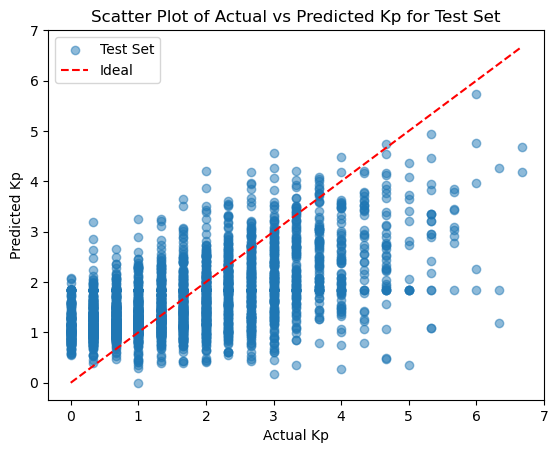

In [ ]:
#Making predictions on the test set and visualising the results including RMSE
predictions = model.predict(test_features)
rmse = np.sqrt(mean_squared_error(test_target, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

#Scatter plot for the test set
plt.scatter(test_target, predictions, alpha=0.5, label="Test Set")
plt.plot([min(test_target), max(test_target)], [min(test_target), max(test_target)], '--', color='red', label="Ideal")
plt.xlabel("Actual Kp")
plt.ylabel("Predicted Kp")
plt.legend()
plt.title("Scatter Plot of Actual vs Predicted Kp for Test Set")
plt.show()


In [ ]:
print("Shape of test:", test_target.shape)
print("Shape of predictions:", predictions.shape)


Shape of test: (3207,)
Shape of predictions: (3207, 1)


In [ ]:
predictions

array([[1.4002968],
       [0.9303357],
       [1.8346994],
       ...,
       [1.2849926],
       [1.8346994],
       [3.8531206]], dtype=float32)

Testing the model

In [ ]:

dx23=pd.read_csv("2023kp.csv")
column_names = ['Date_Time', 'Magnetic_Field_X', 'Magnetic_Field_Y', 'Magnetic_Field_Z']
column_names.extend(['SW_Flux_' + str(i) for i in range(1, 51)])
d23=pd.read_csv("dsc_fc_summed_spectra_2023_v01.csv",header=None, names=column_names, na_values=0)
d23.info()
d23.isnull().sum()
d23['Date_Time'] = pd.to_datetime(d23['Date_Time'])
d23.set_index('Date_Time', inplace=True)
d23_per_3_hours = d23.resample('3H').mean()
d23_per_3_hours

d23_per_3_hours.isnull().sum()
d23_filled_numeric = d23_per_3_hours.apply(pd.to_numeric, errors='coerce')





# Calculating the mean
column_means = d23_filled_numeric.mean()

# Filling missing values with the mean
d23_fill = d23_filled_numeric.fillna(column_means)

# Displaying the filled DataFrame

d23_fill.isnull().sum()

d23_fill


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175680 entries, 0 to 175679
Data columns (total 54 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date_Time         175680 non-null  object 
 1   Magnetic_Field_X  174655 non-null  float64
 2   Magnetic_Field_Y  174655 non-null  float64
 3   Magnetic_Field_Z  174655 non-null  float64
 4   SW_Flux_1         168137 non-null  float64
 5   SW_Flux_2         168131 non-null  float64
 6   SW_Flux_3         168137 non-null  float64
 7   SW_Flux_4         168140 non-null  float64
 8   SW_Flux_5         168139 non-null  float64
 9   SW_Flux_6         168140 non-null  float64
 10  SW_Flux_7         168142 non-null  float64
 11  SW_Flux_8         168140 non-null  float64
 12  SW_Flux_9         168140 non-null  float64
 13  SW_Flux_10        168135 non-null  float64
 14  SW_Flux_11        168139 non-null  float64
 15  SW_Flux_12        168138 non-null  float64
 16  SW_Flux_13        16

,Magnetic_Field_X,Magnetic_Field_Y,Magnetic_Field_Z,SW_Flux_1,SW_Flux_2,SW_Flux_3,SW_Flux_4,SW_Flux_5,SW_Flux_6,SW_Flux_7,...,SW_Flux_41,SW_Flux_42,SW_Flux_43,SW_Flux_44,SW_Flux_45,SW_Flux_46,SW_Flux_47,SW_Flux_48,SW_Flux_49,SW_Flux_50
Date_Time,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,-2.991344,1.479246,-0.502024,19.841023,0.231726,0.764883,12.606813,7.310914,0.247645,5.080724,...,311.169741,284.100833,397.990333,406.014000,342.999000,340.691141,357.443056,354.528083,352.20267,256.43725
2023-01-01 03:00:00,-3.307634,1.690574,0.068592,14.745019,0.231726,0.367033,3.152081,5.508507,0.245177,0.702307,...,341.836176,283.330300,388.296500,351.169138,314.962092,340.691141,357.443056,354.528083,352.20267,256.43725
2023-01-01 06:00:00,-3.494908,0.819942,-0.902655,8.571423,0.231726,0.234476,1.008148,3.133721,0.234317,0.255251,...,378.142500,301.474223,362.315918,351.169138,314.962092,340.691141,357.443056,354.528083,352.20267,256.43725
2023-01-01 09:00:00,-3.172142,1.257525,1.414932,8.646850,0.231726,0.276994,1.363520,2.016709,0.231726,0.392728,...,339.475000,294.543750,362.315918,351.169138,314.962092,340.691141,357.443056,354.528083,352.20267,256.43725
2023-01-01 12:00:00,-2.974086,2.190697,-0.234854,14.791366,0.231726,0.231726,0.964596,6.086467,0.231726,0.250266,...,368.336664,301.474223,362.315918,351.169138,314.962092,340.691141,357.443056,354.528083,352.20267,256.43725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-02 09:00:00,4.527340,-0.300102,0.244972,1.264590,0.231726,0.392370,0.231726,0.232078,0.231726,0.231726,...,368.336664,301.474223,362.315918,351.169138,314.962092,340.691141,357.443056,354.528083,352.20267,256.43725
2023-05-02 12:00:00,3.569858,1.563384,1.443822,1.263190,0.231726,0.354059,0.231726,0.231726,0.231726,0.231726,...,368.336664,301.474223,362.315918,351.169138,314.962092,340.691141,357.443056,354.528083,352.20267,256.43725
2023-05-02 15:00:00,4.224378,0.180576,-0.906981,1.123050,0.231726,0.886440,0.353309,0.397666,0.231726,0.232609,...,368.336664,301.474223,362.315918,351.169138,314.962092,340.691141,357.443056,354.528083,352.20267,256.43725


In [ ]:


new_data1=d23_fill

scaler = StandardScaler()

# Fiting and transforming the data
scaled_data1 = scaler.fit_transform(new_data1)

# Converting the scaled data back to a DataFrame type
df_scaled1 = pd.DataFrame(scaled_data1, columns=new_data1.columns)
df_scaled1.shape


(976, 53)

In [ ]:
scaled_data1.shape

(16032, 53)

In [ ]:
d23_fill.shape

(976, 53)

In [ ]:
dx23=dx23[:976]

In [ ]:
columns_to_drop1 = ['YYY', 'MM','DD','hh.h','hh._m','days','days_m','ap','D']
dx23 = dx23.drop(columns=columns_to_drop1)




In [ ]:
df_scaled1.shape
d23_fill.shape


(976, 53)

In [ ]:
d23_fill.shape

(976, 53)

In [ ]:
feature_columns = [
    "Magnetic_Field_X",
    "Magnetic_Field_Y",
    "Magnetic_Field_Z",
    "SW_Flux_24",
    "SW_Flux_25",
    "SW_Flux_26",
    "SW_Flux_27",
    "SW_Flux_28",
    "SW_Flux_29",
    "SW_Flux_30",
    "SW_Flux_31",
    "SW_Flux_32"
]


test_features1=df_scaled1[feature_columns]
test_features1 = np.reshape(test_features1.values, (test_features1.shape[0], 1, test_features1.shape[1]))
predictions1 = model.predict(test_features1)


31/31 [==============================] - 0s 3ms/step


In [ ]:
test_features1

array([[[-0.93109158,  0.43527167, -0.1499233 , ...,  2.39043102,
          2.63110696,  1.62787574]],

       [[-1.01843503,  0.48294308,  0.02097753, ...,  1.69485291,
          1.93063889,  1.13623736]],

       [[-1.07015067,  0.28654548, -0.26991299, ...,  1.37548961,
          1.39250396,  0.59265064]],

       ...,

       [[ 1.06152921,  0.14231683, -0.27120855, ..., -0.01696741,
         -0.02708527, -0.47539499]],

       [[ 0.84646761,  0.82896002, -0.47889331, ..., -0.65680057,
          0.0278661 ,  0.11931366]],

       [[ 1.0638693 ,  0.84388732, -0.01546204, ..., -0.45181129,
         -0.1529935 , -0.31978169]]])

In [ ]:
predictions1

array([[ 4.77372265e+00],
       [ 3.05305910e+00],
       [ 2.62213540e+00],
       [ 2.59644008e+00],
       [ 4.44057751e+00],
       [ 5.48801994e+00],
       [ 9.36937809e+00],
       [ 9.03213406e+00],
       [ 6.45630455e+00],
       [ 6.64962769e+00],
       [ 4.10752439e+00],
       [ 4.95394278e+00],
       [ 2.98234177e+00],
       [-5.29704630e-01],
       [ 8.50584626e-01],
       [-2.65227973e-01],
       [-7.30537295e-01],
       [-5.63619494e-01],
       [-6.81400537e-01],
       [-5.47819257e-01],
       [-5.98026216e-01],
       [-5.87886512e-01],
       [ 7.98985004e-01],
       [ 7.11926985e+00],
       [ 6.70599699e+00],
       [ 6.66383123e+00],
       [ 7.45427132e+00],
       [ 1.30836558e+00],
       [-9.19191241e-01],
       [-5.33414841e-01],
       [-5.09394705e-03],
       [ 1.22757658e-01],
       [ 1.12353757e-01],
       [ 7.56762475e-02],
       [-3.61295491e-02],
       [-3.46101940e-01],
       [ 5.09973383e+00],
       [ 2.33709574e+00],
       [-6.1

In [ ]:
predictions1.shape

(976, 1)

In [ ]:

predictions1.shape

(976, 1)

In [ ]:
dx23=dx23[:976]
dx23

0      2.333
1      3.000
2      2.000
3      2.667
4      1.667
       ...  
971    2.667
972    1.000
973    1.000
974    1.667
975    0.667
Name: Kp, Length: 976, dtype: float64

In [ ]:

print("Shape of dx23:", dx23.shape)
print("Shape of predictions:", predictions1.shape)


Shape of dx23: (976,)
Shape of predictions: (976, 1)


Root Mean Squared Error (RMSE): 3.1644183001713935


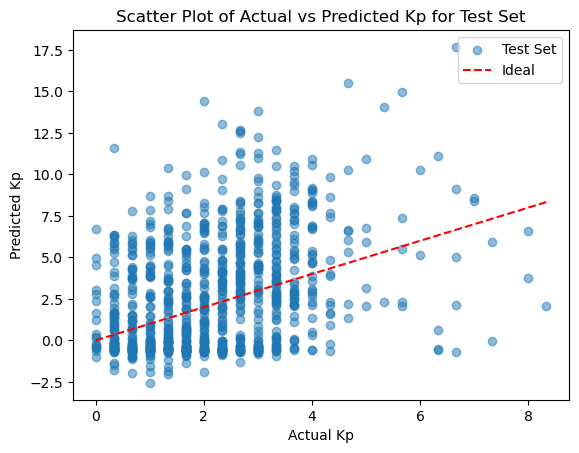

In [ ]:

'''
#Making predictions on the test set and visualising the results including RMSE
rmse = np.sqrt(mean_squared_error(dx23, predictions1))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Scatter plot for the test set
plt.scatter(dx23, predictions1, alpha=0.5, label="Test Set")
plt.plot([min(dx23), max(dx23)], [min(dx23), max(dx23)], '--', color='red', label="Ideal")
plt.xlabel("Actual Kp")
plt.ylabel("Predicted Kp")
plt.legend()
plt.title("Scatter Plot of Actual vs Predicted Kp for Test Set")
plt.show()'''
